In [4]:
import numpy as np
import script.model.bonds as bd
import script.model.model as sim
import script.model.utility as utl
import copy
import scipy.special as spe
from importlib import reload
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import quad
import json


# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='medium')
# plt.rc('ytick', labelsize='medium')

def getFig(figsize=(4, 3), xlab="", ylab=""):
    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    if xlab:
        ax.set_xlabel(xlab)
    if ylab:
        ax.set_ylabel(ylab)
    return ax
tB = 1e-10

In [5]:
reload(sim)

prm_dict = sim.prm_dict.copy()
prm_dict["scheme"] = "step"
prm_dict["tc"] = -1
prm_dict["l0_list"] = [100, 0]
prm_dict["f0"] = 0
prm_dict["elist"] = [8, 9, 0, 0]
prm_dict["ton"] = 1e20   #0.3*np.exp(2)#1e20 #1e8-> kon=0.01
prm_dict["tm"] = 1000

In [7]:
np.exp(-8)

0.00033546262790251185

In [6]:
sto1 = sim.Stoch(prm_dict)
sto1.loadSharing=False
sto1.setup()
sto1.get_info()

num pairs: 2, num_spec=4
bond info:
Eb: 		 [8, 9, 0, 0]
off rate:	 [0.00033546262790251185, 0.00012340980408667953, 1.0, 1.0]
life time:	 [2.98095799e+03 8.10308393e+03 1.00000000e+00 1.00000000e+00]
on rate:	 [1e-20, 1e-20, 1e-20, 1e-20]
ligand num:	 1000 1000 [100, 0]
------------
force info:
scheme:  step
tc: -1
f0:  0
current f 0
------------
complex info:
bond states: m1=0, n1=0, m2=0, n2=0
m max: 0.0
------------
reaction rate:
[0.00033546262790251185, 1e-20, 0.00012340980408667953, 1e-20, 1.0, 1e-20, 1.0, 1e-20, 0]


In [28]:
sto1.run1()
print(sto1.t_record[-1])
pass

Info:
  Init population: [APC-Ag-BCR, Ag-BCR] =  [100, 0, 0, 0]
  reaction rate: 
  Bond	APC	BCR
Finished at step 100
Final pop (Sim):
	BCR-Ag:		 47.0 
	Ag-CR:		 53.0
Final time: 1.071e+02
reaction counts:
	APC-Ag0_off:	47
	APC-Ag0_on:	0
	BCR-Ag0_off:	53
	BCR-Ag0_on:	0
	APC-Ag1_off:	0
	APC-Ag1_on:	0
	BCR-Ag1_off:	0
	BCR-Ag1_on:	0
	force updates:	0
(101, 1) (101, 4)
0.0
107.05412318206415


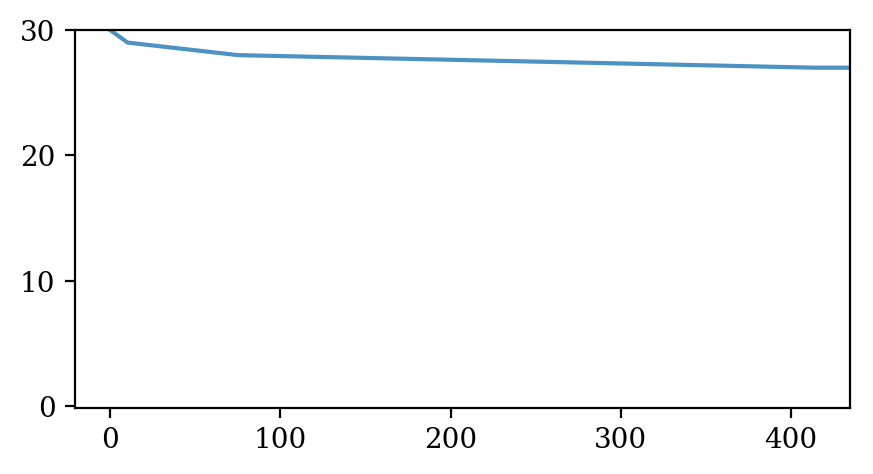

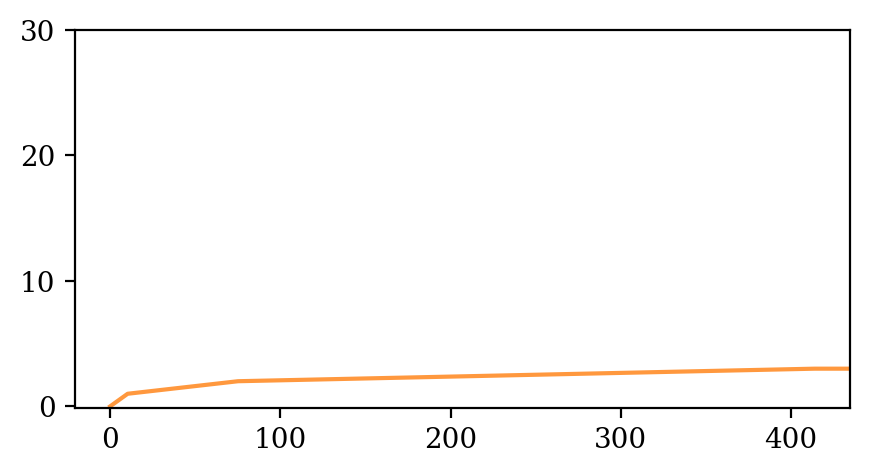

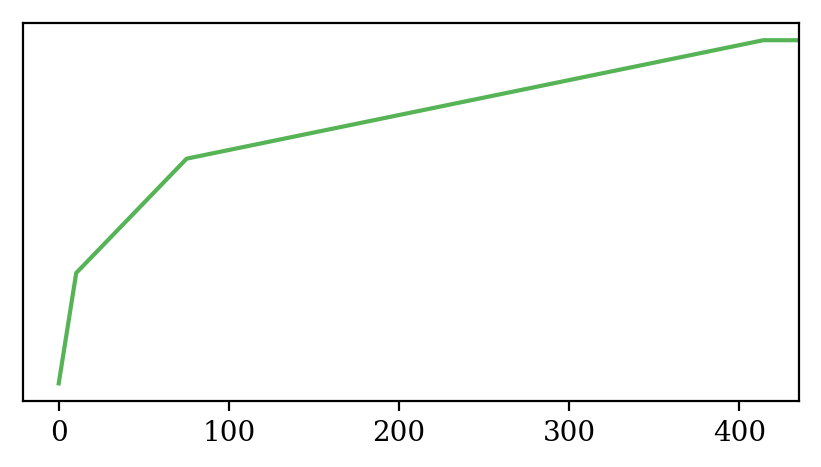

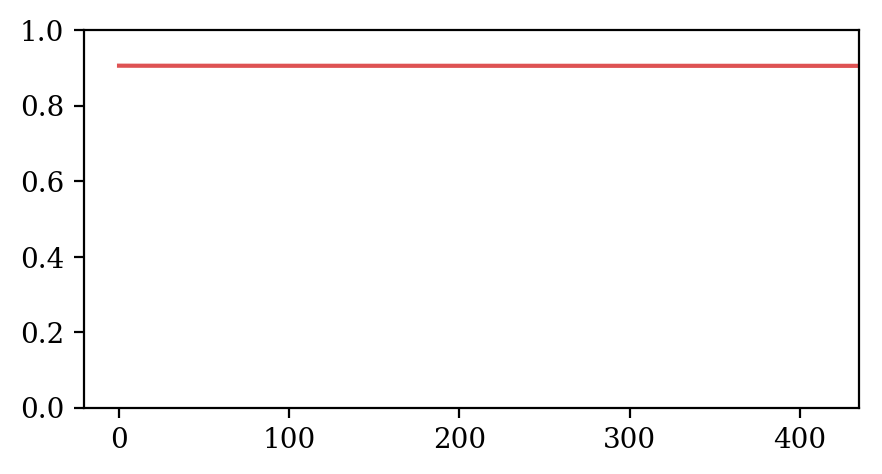

In [121]:
fig, ax = plt.subplots(figsize=(5,2.5), dpi=200)
plt.plot(np.concatenate([np.asarray(sto1.t_record), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-', color="C0", label="BCR-Ag-APC, m", ms=2, fillstyle="none", alpha=0.8)
#plt.plot(np.concatenate([np.asarray(sto1.t_record), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.spec_record[:,1],[sto1.spec_record[-1,1]]]), '-', color="C1", label="BCR-Ag, n", ms=2, fillstyle="none", alpha=0.8)
plt.xlim(-0.05*max(sto1.t_record),1.05*max(sto1.t_record))
plt.ylim(-0.1, 30)
plt.show()

fig, ax = plt.subplots(figsize=(5,2.5), dpi=200)
#plt.plot(np.concatenate([np.asarray(sto1.t_record), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-', color="C0", label="BCR-Ag-APC, m", ms=2, fillstyle="none", alpha=0.8)
plt.plot(np.concatenate([np.asarray(sto1.t_record), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.spec_record[:,1],[sto1.spec_record[-1,1]]]), '-', color="C1", label="BCR-Ag, n", ms=2, fillstyle="none", alpha=0.8)
plt.xlim(-0.05*max(sto1.t_record),1.05*max(sto1.t_record))
plt.ylim(-0.1, 30)
plt.show()


fig, ax = plt.subplots(figsize=(5,2.5), dpi=200)
#plt.plot(np.concatenate([np.asarray(sto1.t_record[:]), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.f_record[:],[sto1.f_record[-1]]]), '-', color="C2", label="F/m", ms=2, fillstyle="none", alpha=0.8)
#plt.plot(np.concatenate([np.asarray(sto1.t_record), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-', color="C0", label="BCR-Ag-APC, m", ms=2, fillstyle="none", alpha=0.8)
plt.plot(np.concatenate([np.asarray(sto1.t_record[:]), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.f_record[:],[sto1.f_record[-1]]])/np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-', color="C2", label="F/m", ms=2, fillstyle="none", alpha=0.8)
plt.xlim(-0.05*max(sto1.t_record),1.05*max(sto1.t_record))
plt.yscale("log")
plt.show()


def get_eta(ea, eb, f):
    return 1/(np.exp(ea-eb+f*0.5/4.012)+1)

fig, ax = plt.subplots(figsize=(5,2.5), dpi=200)
#plt.plot(np.concatenate([np.asarray(sto1.t_record), [1.1*sto1.t_record[-1]]]), np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-', color="C0", label="BCR-Ag-APC, m", ms=2, fillstyle="none", alpha=0.8)
plt.plot(np.concatenate([np.asarray(sto1.t_record[:]), [1.1*sto1.t_record[-1]]]), get_eta(0, np.log(10), np.concatenate([sto1.f_record[:],[sto1.f_record[-1]]])/np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]])), '-', color="C3", label="eta", ms=2, fillstyle="none", alpha=0.8)
plt.xlim(-0.05*max(sto1.t_record),1.05*max(sto1.t_record))
plt.ylim(0, 1)
plt.show()


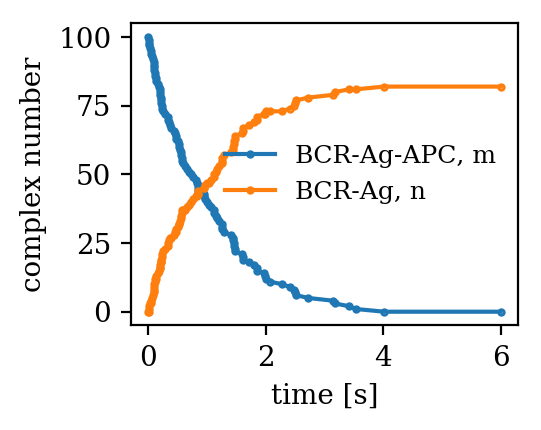

In [25]:
fig, ax = plt.subplots(figsize=(2.5,2), dpi=200)
# plt.plot(np.concatenate([sto1.t_record, [300]]), np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-', color="C0", label="BCR-Ag-APC, m", ms=2, fillstyle="none", alpha=1)
# plt.plot(np.concatenate([sto1.t_record, [300]]), np.concatenate([sto1.spec_record[:,1],[sto1.spec_record[-1,1]]]), '-', color="C1", label="BCR-Ag, n", ms=2, fillstyle="none", alpha=1)
plt.plot(np.concatenate([sto1.t_record, [6]]), np.concatenate([sto1.spec_record[:,0],[sto1.spec_record[-1,0]]]), '-o', color="C0", label="BCR-Ag-APC, m", ms=2, fillstyle="none", alpha=1)
plt.plot(np.concatenate([sto1.t_record, [6]]), np.concatenate([sto1.spec_record[:,1],[sto1.spec_record[-1,1]]]), '-o', color="C1", label="BCR-Ag, n", ms=2, fillstyle="none", alpha=1)


# plt.ylim(0, 100)
# plt.xlim(0, 12)
plt.legend(frameon=False, fontsize=9)
ax.set(xlabel="time [s]", ylabel="complex number")
#plt.savefig("figs/traj_with_rebinding.pdf", format='pdf')
plt.show()

In [29]:
sto1.run(output=True)

count= 1000................................................99%
nbar=44.83000, nstd=5.02246, t=186.01, f=10.000


(44.83, 5.022459556830697, 186.01499302454073)

In [30]:
prm_dict["f0"] = 10
prm_dict["elist"] = [8, 9.5, 0, 0]
sto0 = sim.Stoch(prm_dict)
sto0.setup()
sto0.loadSharing=False
sto0.run1()
pass

Info:
  Init population: [APC-Ag-BCR, Ag-BCR] =  [100, 0, 0, 0]
  reaction rate: 
  Bond	APC	BCR
Finished at step 100
Final pop (Sim):
	BCR-Ag:		 55.0 
	Ag-CR:		 45.0
Final time: 2.503e+02
reaction counts:
	APC-Ag0_off:	55
	APC-Ag0_on:	0
	BCR-Ag0_off:	45
	BCR-Ag0_on:	0
	APC-Ag1_off:	0
	APC-Ag1_on:	0
	BCR-Ag1_off:	0
	BCR-Ag1_on:	0
	force updates:	0
(101, 1) (101, 4)
0.0


In [31]:
sto0.run()

count= 1000................................................99%
nbar=57.02700, nstd=5.06599, t=235.99, f=10.000


(57.027, 5.0659916107313085, 235.9876646918623)

In [36]:
sto0.run1()
pass

Info:
  Init population: [APC-Ag-BCR, Ag-BCR] =  [100, 0, 0, 0]
  reaction rate: 
  Bond	APC	BCR
Finished at step 100
Final pop (Sim):
	BCR-Ag:		 55.0 
	Ag-CR:		 45.0
Final time: 2.106e+02
reaction counts:
	APC-Ag0_off:	55
	APC-Ag0_on:	0
	BCR-Ag0_off:	45
	BCR-Ag0_on:	0
	APC-Ag1_off:	0
	APC-Ag1_on:	0
	BCR-Ag1_off:	0
	BCR-Ag1_on:	0
	force updates:	0
(101, 1) (101, 4)
0.0


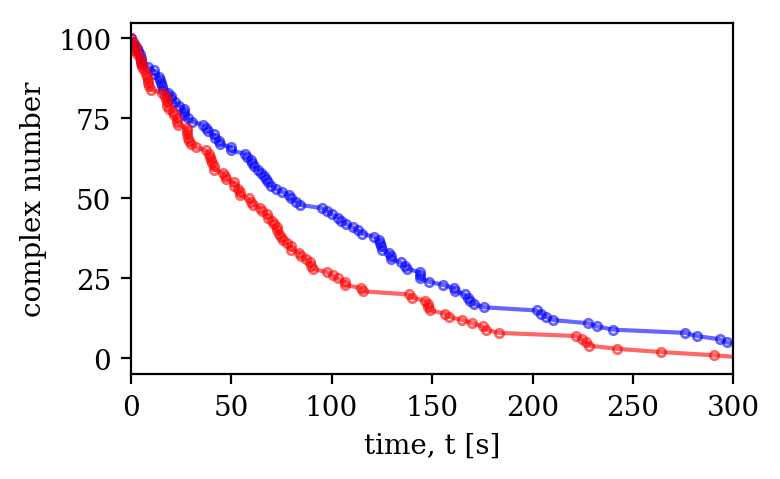

In [19]:
#sto0.run1(output=False)

fig, ax = plt.subplots(figsize=(4,2.5), dpi=200)
plt.plot(np.asarray(sto0.t_record), sto0.spec_record[:,0], '-o', color="b", label="BCR-Ag-APC", ms=3, fillstyle="none", alpha=0.6)
plt.plot(np.asarray(sto1.t_record), sto1.spec_record[:,0], '-o', color="r", label="BCR-Ag-APC", ms=3, fillstyle="none", alpha=0.6)


# plt.plot(np.asarray(sto1.t_record)/sto1.t_record[-1], sto1.spec_record[:,0], '-sC1', label="BCR-Ag-APC", ms=3, fillstyle="none")
# plt.plot(np.asarray(sto2.t_record)/sto2.t_record[-1], sto2.spec_record[:,0],'-^C2', label="BCR-Ag-APC", ms=3, fillstyle="none")
#plt.plot(np.asarray(sto1.t_record)/1000, sto1.spec_record[:,1], label="BCR-Ag")
plt.xlabel("time, t [s]")
plt.ylabel("complex number")
plt.xlim(0, 300)
plt.yticks([0, 25,50, 75, 100])
#plt.legend()
plt.tight_layout()
plt.show()

In [54]:
## save the data
## low affinity sto1
with open("data/main_fig1/low_aff_prm_dict.json", "w") as fp:
    fp.write(json.dumps(sto1.prm_dict, indent=4))
    
with open("data/main_fig1/low_aff_traj_t_record.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto1.t_record))
    
with open("data/main_fig1/low_aff_traj_spec_record.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto1.spec_record), fmt="%d")
    
with open("data/main_fig1/low_aff_lifetime_statistics.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto1.tlist))
    
with open("data/main_fig1/low_aff_nag_statistics.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto1.nags_list), fmt="%d")

## high affinity sto0
with open("data/main_fig1/high_aff_traj_t_record.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto0.t_record))
    
with open("data/main_fig1/high_aff_traj_spec_record.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto0.spec_record), fmt="%d")
    
with open("data/main_fig1/high_aff_lifetime_statistics.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto0.tlist))
    
with open("data/main_fig1/high_aff_nag_statistics.txt", "w") as fp:
    np.savetxt(fp, np.asarray(sto0.nags_list), fmt="%d")



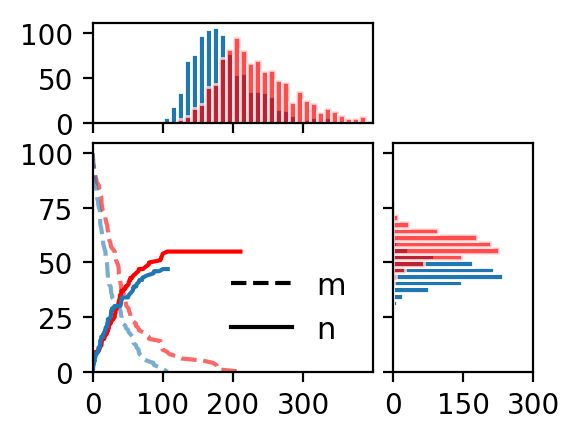

In [38]:
fig, ax = plt.subplots(figsize=(3,2.3), dpi=200)
plt.plot([-1], [-1], '--k', label="m")
plt.plot([-1], [-1], '-k', label="n")
plt.plot(np.asarray(sto0.t_record), sto0.spec_record[:,0], '--', color="r", ms=3, fillstyle="none", alpha=0.6)
plt.plot(np.asarray(sto1.t_record), sto1.spec_record[:,0], '--', color="C0", ms=3, fillstyle="none", alpha=0.6)

plt.plot(np.asarray(sto0.t_record), sto0.spec_record[:,1], '-', color="r",  ms=3, fillstyle="none")
plt.plot(np.asarray(sto1.t_record), sto1.spec_record[:,1], '-', color="C0",  ms=3, fillstyle="none")


plt.legend(frameon=False, fontsize=11)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", size=0.5, pad=0.1, sharex=ax,)
axHisty = divider.append_axes("right", size=0.7, pad=0.1, sharey=ax)

# make some labels invisible
axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)



# # now determine nice limits by hand:
# binwidth = 0.12

# limx1 = (int((xmax-xmin)/binwidth)+1)*binwidth
# limx2 = (int((ymax-ymin)/binwidth) + 1)*binwidth

# bins1 = np.arange(-limx1, limx1 + binwidth, binwidth)
# bins2 = np.arange(-limx2, limx2 + binwidth, binwidth)
bins1 = np.arange(0, 500, 10)
bins2 = np.arange(0, 100, 3)
axHistx.hist(sto1.tlist, bins=bins1, ec="w", color="C0")
axHistx.hist(sto0.tlist, bins=bins1, ec="w", color="r", alpha=0.7)


axHisty.hist(sto1.nags_list[0], bins=bins2, orientation='horizontal', ec="w", color="C0")
axHisty.hist(sto0.nags_list[0], bins=bins2, orientation='horizontal', ec="w", color="r", alpha=0.7)

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

count_ticks = [0, 50, 100]
count_ticks_y = [0, 150, 300]
axHistx.set_yticks(count_ticks)
axHistx.set_yticklabels(count_ticks, fontsize=10)
axHisty.set_xticks(count_ticks_y)
axHisty.set_xticklabels(count_ticks_y, fontsize=10)

# ax.set_xlabel("time, t [s]")
# ax.set_ylabel("complex number")
ax.set_xlim(0, 400)
ax.set_ylim(0, 105)
ax.set_yticks([0, 25,50, 75, 100])
ax.set_xticks([0,  100,200,300])
#plt.legend()
plt.tight_layout()
#plt.savefig("figs/main_fig1/traj.pdf", format='pdf')
plt.show()

In [14]:
prm_dict["tm"] = 1e7
prm_dict["f0"] = 0
sto1 = sim.Stoch(prm_dict)
sto1.setup()
sto1.loadSharing=True
sto1.run1(output=False)


prm_dict["f0"] = 100
sto2 = sim.Stoch(prm_dict)
sto2.setup()
sto2.loadSharing=True
sto2.run1(output=False)


prm_dict["f0"] = 2000
sto3 = sim.Stoch(prm_dict)
sto3.setup()
sto3.get_info()
sto3.loadSharing=True
sto3.run1(output=False)
pass

num pairs: 2, num_spec=4
bond info:
Eb: 		 [8, 9, 0, 0]
off rate:	 [0.00033546262790251185, 0.00012340980408667953, 1.0, 1.0]
life time:	 [2.98095799e+03 8.10308393e+03 1.00000000e+00 1.00000000e+00]
on rate:	 [1e-20, 1e-20, 1e-20, 1e-20]
ligand num:	 1000 1000 [100, 0]
------------
force info:
scheme:  step
tc: -1
f0:  2000
current f 2000
------------
complex info:
bond states: m1=0, n1=0, m2=0, n2=0
m max: 0.0
------------
reaction rate:
[0.00033546262790251185, 1e-20, 0.00012340980408667953, 1e-20, 1.0, 1e-20, 1.0, 1e-20, 0]


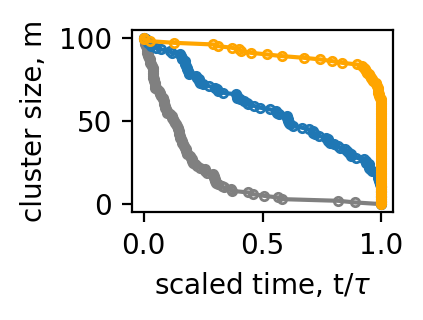

In [15]:
fig, ax = plt.subplots(figsize=(2.2, 1.67), dpi=200)
for stoi, ci in zip([sto1, sto2, sto3], ["gray", "C0", "orange"]):
    plt.plot(stoi.t_record/max(stoi.t_record), stoi.spec_record[:, 0], '-o', color=ci, ms=3, fillstyle='none')
plt.xlabel(r"scaled time, t/$\tau$")
plt.ylabel("cluster size, m")
plt.tight_layout()
#plt.savefig("figs/0202_trajs_sharedF.pdf", format='pdf', transparent=True)

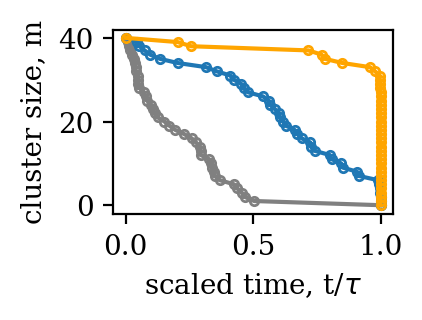

In [784]:
prm_dict["f0"] = 0
prm_dict["l0_list"]= [40, 0]
# prm_dict["f0"] = 1
sto1 = sim.Stoch(prm_dict)
sto1.setup()
sto1.loadSharing=False
sto1.run1(output=False)


prm_dict["f0"] = 40
sto2 = sim.Stoch(prm_dict)
sto2.setup()
sto2.loadSharing=True
sto2.run1(output=False)


prm_dict["f0"] = 1600
sto3 = sim.Stoch(prm_dict)
sto3.setup()
sto3.loadSharing=True
sto3.run1(output=False)

fig, ax = plt.subplots(figsize=(2.2, 1.67), dpi=200)
for stoi, ci in zip([sto1, sto2, sto3], ["gray", "C0", "orange"]):
    plt.plot(stoi.t_record/max(stoi.t_record), stoi.spec_record[:, 0], '-o', color=ci, ms=3, fillstyle='none')
plt.xlabel(r"scaled time, t/$\tau$")
plt.ylabel("cluster size, m")
plt.tight_layout()
pass

In [764]:
def get_fm_gm(f0):
    sto2.prm_dict["f0"] = f0
    l0 = sto2.prm_dict["l0_list"][0]
    
    print("l0=", l0, ", f0=", f0*l0)
    sto2.loadSharing = False
    sto2.setup()
    sto2.run1(output=False)
    fm2 = np.array([1.0*f0]*l0)
    mask2 = sto2.spec_record[1:, 1] - sto2.spec_record[:-1, 1]
    fm2[mask2==0] = np.nan
    gm2 = l0*[sto2.force.get_f(t=1)]

    sto2.prm_dict["f0"] = l0*f0
    sto2.loadSharing = True
    sto2.setup()
    sto2.run1(output=False)
    fm = sto2.force.get_f(t=1)/sto2.spec_record[:-1, 0]
    mask = sto2.spec_record[1:, 1] - sto2.spec_record[:-1, 1]
    gm = sto2.force.get_f(t=1)/sto2.spec_record[:-1, 0]
    fm[mask==0] = None
    return fm2, fm, gm2, gm


fm1, fm01, gm1, gm01 = get_fm_gm(1)

# fm2, fm02, gm2, gm02 = get_fm_gm(10)

# fm3, fm03, gm3, gm03 = get_fm_gm(40)

l0= 40 , f0= 40


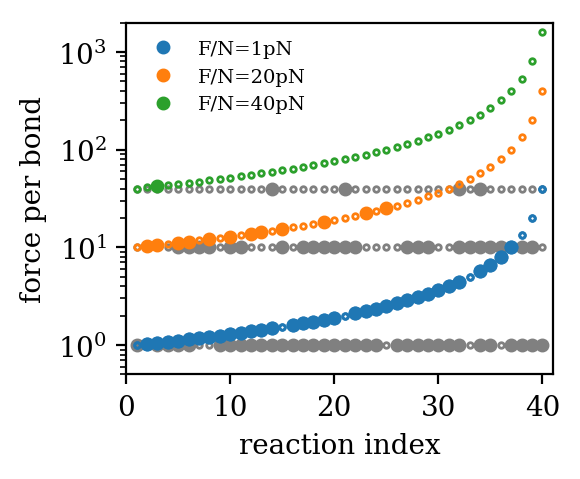

In [765]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)


for fmi, fm0i, gmi, gm0i, ci, li in zip([fm1, fm2, fm3], [fm01, fm02, fm03],
                                        [gm1, gm2, gm3], [gm01, gm02, gm03], 
                                        ["C0", "C1", "C2"], ["1pN", "20pN", "40pN"]):
    plt.plot(range(1, len(fmi)+1), fmi, 'o', color="gray", ms=4, fillstyle='full')
    plt.plot(range(1, len(gmi)+1), gmi , 'o', color="gray", ms=2, fillstyle='none')
    #plt.legend(["Ag extracted", "Ag lost"], fontsize=8)

for fmi, fm0i, gmi, gm0i, ci, li in zip([fm1, fm2, fm3], [fm01, fm02, fm03],
                                        [gm1, gm2, gm3], [gm01, gm02, gm03], 
                                        ["C0", "C1", "C2"], ["1pN", "20pN", "40pN"]):
    plt.plot(range(1, len(fm0i)+1), fm0i, 'o', color=ci, ms=4, fillstyle='full', label="F/N="+li)
    plt.plot(range(1, len(gm0i)+1), gm0i, 'o', color=ci, ms=2, fillstyle='none')



plt.plot(range(1, len(fm01)+1), fm01, 'o', color="C0", ms=4, fillstyle='full')
plt.plot(range(1, len(gm01)+1), gm01, 'o', color="C0", ms=2, fillstyle='none')


plt.legend( fontsize=7, frameon=False)
plt.xlabel(r"reaction index")
plt.ylabel("force per bond")
plt.yscale('log')
plt.ylim(0.5, 2e3)
plt.xlim(0, 41)
plt.tight_layout()
#plt.savefig("figs/force_per_bond_traj4.pdf", format='pdf')
plt.tight_layout()

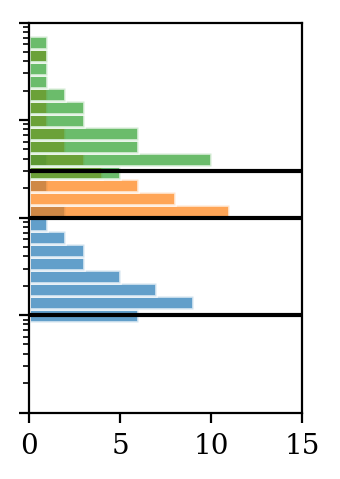

In [729]:
fig, ax = plt.subplots(figsize=(1.8, 2.5), dpi=200)
for fi in [40, 400, 1200]:
    plt.hist([fi/i for i in range(1, 41)], bins=np.logspace(-1, 3, 31), ec='w', alpha=0.7,orientation='horizontal')
plt.hlines(y=1, xmin=0, xmax=15, color='k')
plt.hlines(y=10, xmin=0, xmax=15, color='k')
plt.hlines(y=30, xmin=0, xmax=15, color='k')

plt.xlim(0, 15)
plt.yscale('log')
ax.set_yticks([0.1, 1, 10, 100, 1000])
ax.set_yticklabels([])
plt.ylim(0.1, 1e3)
plt.tight_layout()
#plt.savefig("figs/f_traj_distribution.pdf", format='pdf', transparent=True)
plt.show()

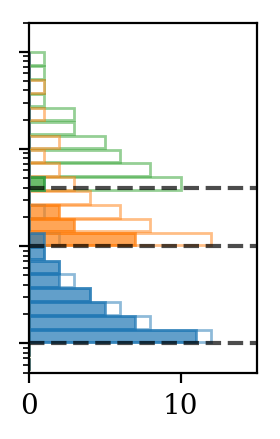

In [777]:
fig, ax = plt.subplots(figsize=(1.5, 2.3), dpi=200)
for yi in [1, 10 ,40]:
    plt.hlines(y=yi, xmin=0, xmax=15, color='k', alpha=0.7, linestyles='--')

nbin = 29
for fi, ci, ni in zip([1600, 400, 40], ["C2", "C1", "C0"], [30, 30, 30]):
    plt.hist([fi/i for i in range(1, 41)], bins=np.logspace(-1, 3, nbin), ec=ci, rwidth=0.9, alpha=0.5,orientation='horizontal', fc='w')
for fi, ci, ni in zip([fm03, fm02, fm01], ["C2", "C1", "C0"], [30, 30, 30]):
    plt.hist(fi, bins=np.logspace(-1, 3, nbin), ec=ci, alpha=0.7, fc=ci,rwidth=0.9, orientation='horizontal')

plt.xlim(0, 15)
plt.yscale('log')
ax.set_yticks([0.1, 1, 10, 100, 1000])
ax.set_yticklabels([])
plt.ylim(0.5, 2e3)
plt.tight_layout()
#plt.savefig("figs/f_traj_distribution4.pdf", format='pdf', transparent=True)
plt.show()

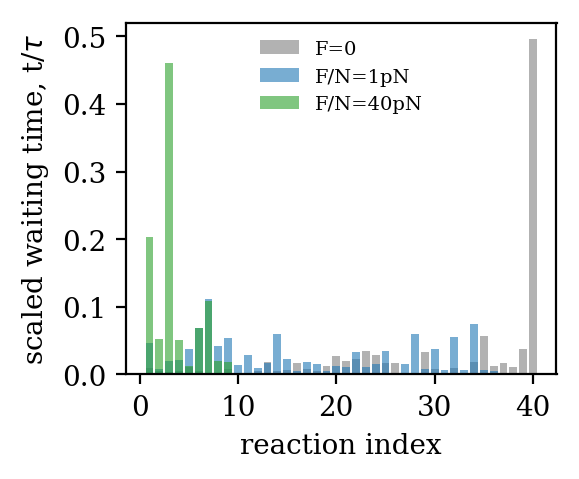

In [785]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)

for stoi, ci in zip([sto1, sto2, sto3], ["gray", "C0", "C2"]):

    t2 = stoi.t_record[1:] - stoi.t_record[:-1]
    #plt.plot(t2/stoi.t_record[-1], 'o', color=ci, ms=3, fillstyle='full', alpha=0.6)
    plt.bar(range(1, len(t2)+1), t2/stoi.t_record[-1], color=ci, alpha=0.6)
    # plt.legend(["Ag extracted", "Ag lost"], fontsize=8)
plt.xlabel(r"reaction index")
plt.ylabel(r"scaled waiting time, t/$\tau$")
# plt.yscale('log')
# plt.ylim(0.001, 1)
plt.tight_layout()
#plt.savefig("figs/force_per_bond_traj.pdf", format='pdf')
plt.legend(["F=0", "F/N=1pN", "F/N=40pN"], fontsize=7,loc=0, frameon=False)
#plt.savefig("figs/waiting_time_traj.pdf", format='pdf')
plt.tight_layout()

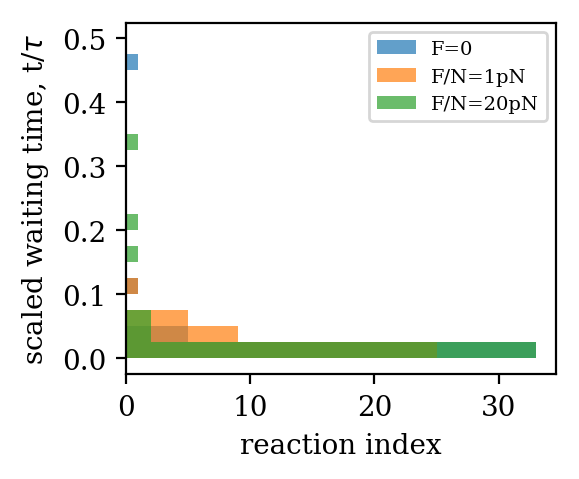

In [632]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)

for stoi, ci in zip([sto1, sto2, sto3], ["gray", "C0", "C1"]):

    t2 = stoi.t_record[1:] - stoi.t_record[:-1]
    plt.hist(t2/stoi.t_record[-1], alpha=0.7, bins=np.linspace(0, 0.5, 21), orientation="horizontal")
    # plt.legend(["Ag extracted", "Ag lost"], fontsize=8)
plt.xlabel(r"reaction index")
plt.ylabel(r"scaled waiting time, t/$\tau$")
# plt.yscale('log')
# plt.ylim(1, 1e3)
plt.tight_layout()
#plt.savefig("figs/force_per_bond_traj.pdf", format='pdf')
plt.legend(["F=0", "F/N=1pN", "F/N=20pN"], fontsize=7)
plt.tight_layout()

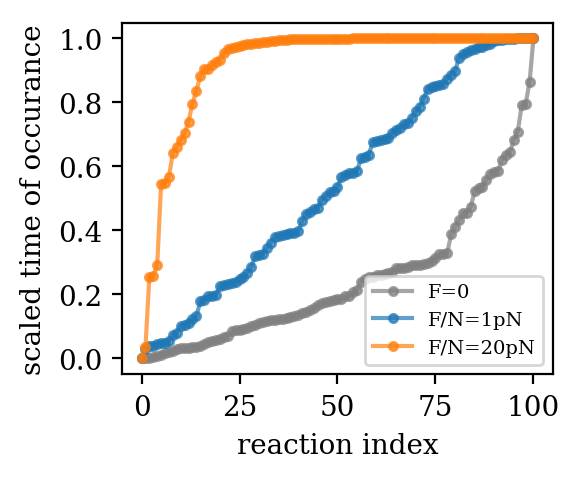

In [566]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)

for stoi, ci in zip([sto1, sto2, sto3], ["gray", "C0", "C1"]):

    #t2 = stoi.t_record[1:] - stoi.t_record[:-1]
    plt.plot(stoi.t_record/stoi.t_record[-1], '-o', color=ci, ms=3, fillstyle='full', alpha=0.7)
    # plt.legend(["Ag extracted", "Ag lost"], fontsize=8)
plt.xlabel(r"reaction index")
plt.ylabel(r"scaled time of occurance")
# plt.yscale('log')
# plt.ylim(1, 1e3)
plt.tight_layout()
#plt.savefig("figs/force_per_bond_traj.pdf", format='pdf')
plt.legend(["F=0", "F/N=1pN", "F/N=20pN"], fontsize=7, loc=4)
plt.tight_layout()

/home/jhongda/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


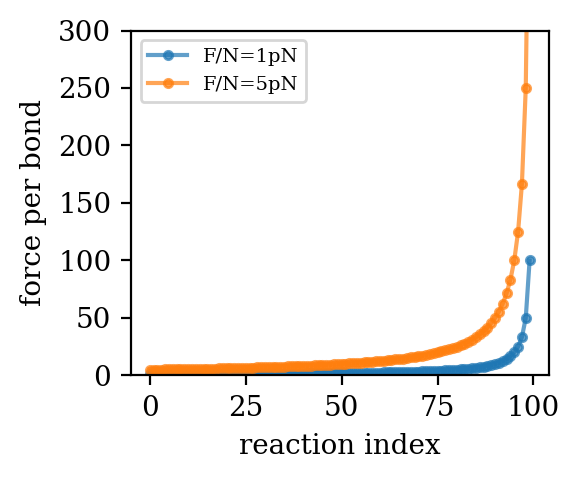

In [438]:
fig, ax = plt.subplots(figsize=(3, 2.5), dpi=200)

for stoi, ci in zip([ sto2, sto3], ["C0", "C1"]):

    #t2 = stoi.t_record[1:] - stoi.t_record[:-1]
    plt.plot(stoi.f_record/stoi.spec_record[:, 0], '-o', color=ci, ms=3, fillstyle='full', alpha=0.7)
    
    
# for stoi, ci in zip([sto1, sto2, sto3], ["gray", "C0", "C1"]):
#     plt.plot([stoi.f_record/stoi.spec_record[0, 0]]*100, '--', color=ci)
    # plt.legend(["Ag extracted", "Ag lost"], fontsize=8)
plt.xlabel(r"reaction index")
plt.ylabel(r"force per bond")
#plt.yscale('log')
plt.ylim(0, 300)
plt.tight_layout()
#plt.savefig("figs/force_per_bond_traj.pdf", format='pdf')
plt.legend(["F/N=1pN", "F/N=5pN"], fontsize=7, loc=0)
plt.tight_layout()